# group assignment

In this assignment, you will apply your advanced programming and data analysis skills to solve a real-world problem.
In practice, you will have to identify relevant patterns in very complex chemoinformatics data and apply them to a new set of molecules you don’t know the ALDH1 inhibition of. 



## 1 preprocessing:
**import all packages:**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

**import data:**

In [2]:
df_data = pd.read_csv('tested_molecules-1.csv')
df_inh = df_data[df_data['ALDH1_inhibition'] == 1]
df_data

,SMILES,ALDH1_inhibition
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1
...,...,...
995,COc1ccc(N2C(=O)CC([NH2+]C3CC3)C2=O)cc1,0
996,CCNc1oc(COc2cccc(C)c2)nc1C#N,0
997,NC(=O)Cn1cnc(-c2ccccc2)c1,0
998,Cc1cc(NC(=O)CSc2nc3c(c(=O)n(C)c(=O)n3C)n2C(C)C...,0


**Get disciptive data:**
To get all the discriptive data we need to make a list of the disciptions we want. We can filter 2 main branches from this: physical descriptive data & group descriptive data. This is done next:

In [3]:
descriptions_list = [n[0] for n in Descriptors._descList]
physical_descriptions = [i for i in descriptions_list if not i.startswith('fr_')]
group_descriptions = [i for i in descriptions_list if i.startswith('fr_')]

phys_calc = MoleculeDescriptors.MolecularDescriptorCalculator(physical_descriptions)
grp_calc = MoleculeDescriptors.MolecularDescriptorCalculator(group_descriptions)

mols = [Chem.MolFromSmiles(smi) for smi in df_data['SMILES']]

In [4]:
phys_dscr = [phys_calc.CalcDescriptors(m)  for m in mols]
grp_dscr = [grp_calc.CalcDescriptors(m)  for m in mols]

df_physical = pd.DataFrame(data = phys_dscr.copy(),columns=physical_descriptions)
df_physical

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR
0,13.083531,13.083531,0.001173,-0.683140,0.520365,463.542,434.310,463.233188,178,0,...,8,2,10,8,0,1,1,4,1.50330,126.8344
1,12.170097,12.170097,0.066966,-0.066966,0.498564,378.457,360.313,378.115047,136,0,...,6,1,7,7,0,0,0,4,3.48110,104.3507
2,10.905837,10.905837,0.016881,-0.016881,0.382043,477.589,444.325,477.260865,184,0,...,8,2,9,9,0,1,1,5,2.83782,129.8585
3,11.562446,11.562446,0.270607,-0.454447,0.795948,330.609,317.505,328.981818,96,0,...,3,0,5,3,0,0,0,2,4.05510,78.7550
4,12.108866,12.108866,0.086947,-3.251317,0.687618,419.553,402.417,419.043204,140,0,...,6,1,9,5,0,0,0,4,3.37490,110.0965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.276695,12.276695,0.095308,-0.234165,0.779148,261.301,244.165,261.123369,100,0,...,3,1,5,4,1,1,2,3,0.05290,68.8394
996,8.926724,8.926724,0.197944,0.197944,0.891297,257.293,242.173,257.116427,98,0,...,5,1,5,5,0,0,0,2,2.86550,70.8927
997,10.688087,10.688087,0.166502,-0.368508,0.805927,201.229,190.141,201.090212,76,0,...,3,1,4,3,0,0,0,2,1.03540,56.8574
998,12.603109,12.603109,0.065686,-0.447592,0.644831,392.441,372.281,392.126674,144,0,...,10,1,11,5,0,0,0,3,1.04182,101.1937


In [5]:
df_group = pd.DataFrame(data=grp_dscr.copy(),columns=group_descriptions)
df_group

,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,3,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,5,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,5,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


**Check for empty rows:**

In [6]:
phys_empty = len(df_physical[pd.isna(df_physical).any(axis=1)])
grp_empty = len(df_group[pd.isna(df_group).any(axis=1)])

print("The physical data has {} empty rows. The group data has {} empty rows.".format(phys_empty,grp_empty))

The physical data has 0 empty rows. The group data has 0 empty rows.


**Check for highly correlated data (correlation > 0.9):**

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6743: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6744: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


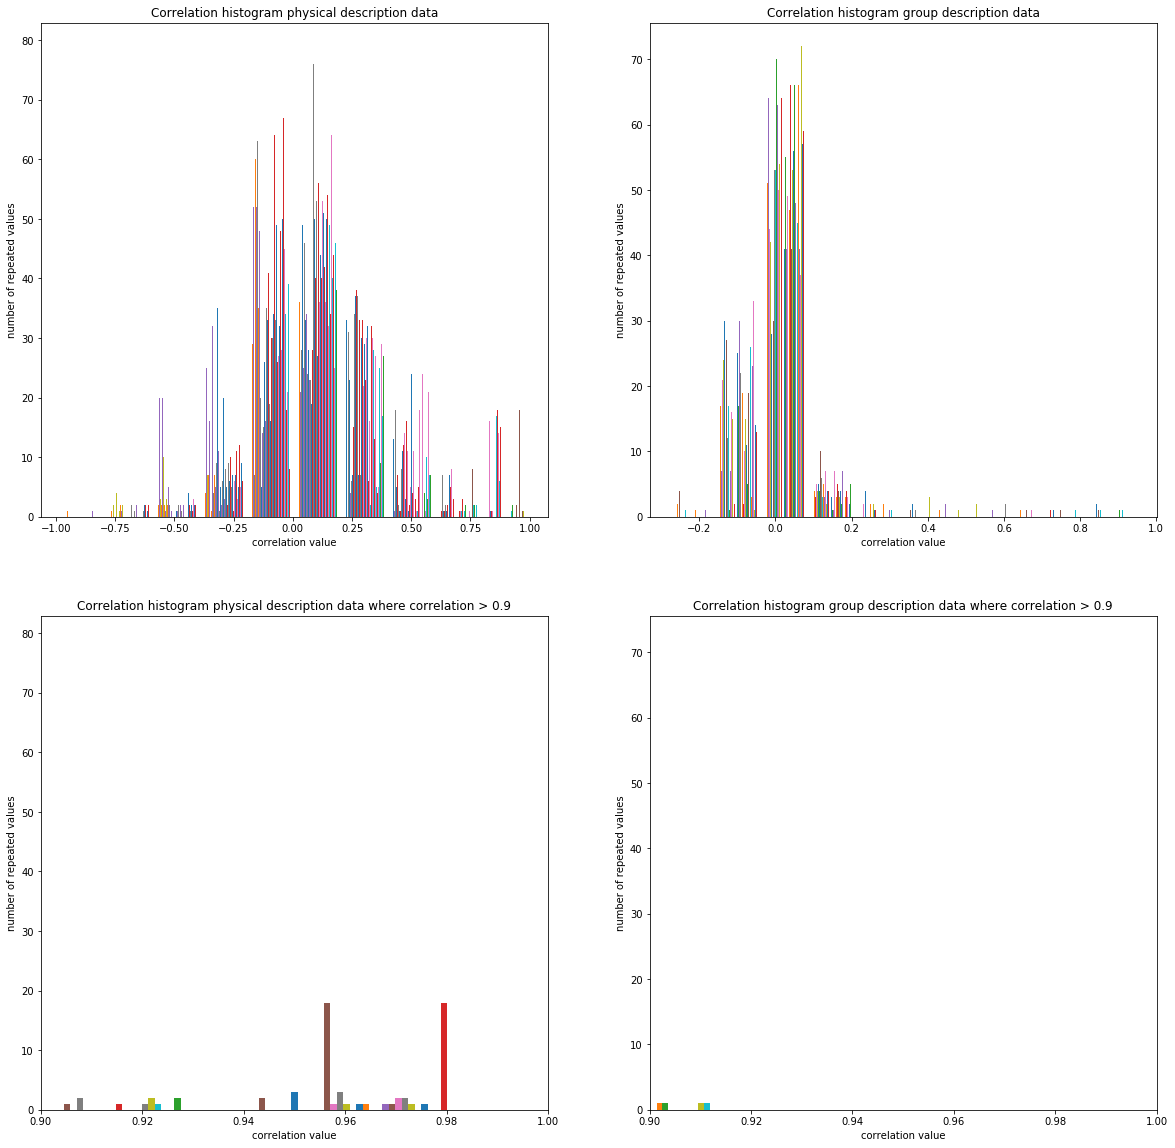

In [7]:
df_phys_corr = df_physical.corr()
df_grp_corr = df_group.corr()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

ax[0,0].hist(df_phys_corr[df_phys_corr != 1]);
ax[0,0].set_title('Correlation histogram physical description data');
ax[0,0].set_ylabel('number of repeated values');
ax[0,0].set_xlabel('correlation value');
ax[0,1].hist(df_grp_corr[df_grp_corr != 1]);
ax[0,1].set_title('Correlation histogram group description data');
ax[0,1].set_ylabel('number of repeated values');
ax[0,1].set_xlabel('correlation value');
ax[1,0].hist(df_phys_corr[df_phys_corr != 1]);
ax[1,0].set_xlim(0.9,1.0);
ax[1,0].set_title('Correlation histogram physical description data where correlation > 0.9');
ax[1,0].set_ylabel('number of repeated values');
ax[1,0].set_xlabel('correlation value');
ax[1,1].hist(df_grp_corr[df_grp_corr != 1]);
ax[1,1].set_xlim(0.9,1.0);
ax[1,1].set_title('Correlation histogram group description data where correlation > 0.9');
ax[1,1].set_ylabel('number of repeated values');
ax[1,1].set_xlabel('correlation value');
fig.savefig('correlation.png')

In [8]:
df_phys_corr = df_phys_corr.abs()
upper = df_phys_corr.where(np.triu(np.ones(df_phys_corr.shape),k=1).astype(np.bool))
to_drop = [col for col in upper.columns if any(upper[col]>0.9)]
df_physical_filtered = df_physical.drop(columns=to_drop)

df_grp_corr = df_grp_corr.abs()
upper = df_grp_corr.where(np.triu(np.ones(df_grp_corr.shape),k=1).astype(np.bool))
to_drop = [col for col in upper.columns if any(upper[col]>0.9)]
df_group_filtered = df_group.drop(columns=to_drop)

phy_corr_len = len(df_physical.columns)-len(df_physical_filtered.columns)
grp_corr_len = len(df_group.columns)-len(df_group_filtered.columns)

print("The physical data has {} highly correlated variables. The group data has {} highly correlated variables.".format(phy_corr_len,grp_corr_len))

The physical data has 29 highly correlated variables. The group data has 5 highly correlated variables.


**Check for extreme variables (with a huge maximum or minimun --> so the std is very big):**

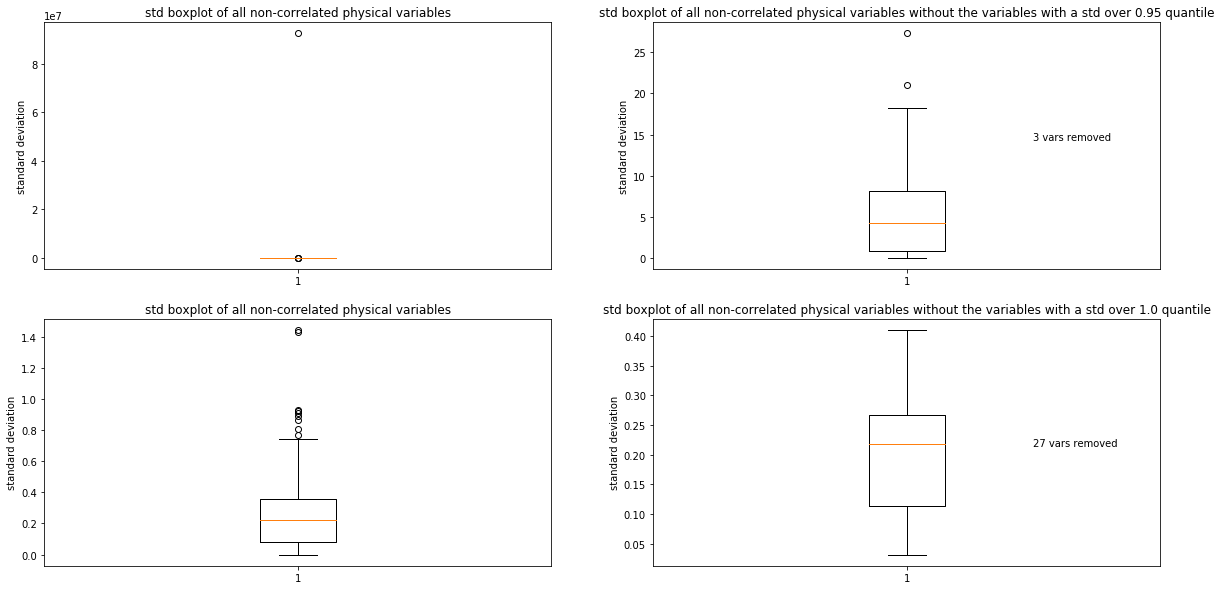

In [9]:
df_phys_desc = df_physical_filtered.describe().loc['mean':,:]
df_grp_desc = df_group_filtered.describe().loc['mean':,:]

def reject_outliers(data, quant=0.95):
    m = data.quantile(q=quant)
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else np.zeros(len(d))
    
    return data[s>m].index

quant_phys = 0.95
quant_grp = 1.0
phys_rejected_outliers = reject_outliers(df_phys_desc.loc['std',:],quant_phys)
grp_rejected_outliers = reject_outliers(df_grp_desc.loc['std',:],quant_grp)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

ax[0,0].boxplot(df_phys_desc.loc['std',:]);
ax[0,0].set_title('std boxplot of all non-correlated physical variables');
ax[0,0].set_ylabel('standard deviation');
ax[0,1].boxplot(df_phys_desc.copy().drop(columns=phys_rejected_outliers).loc['std',:]);
ax[0,1].set_title('std boxplot of all non-correlated physical variables without the variables with a std over {} quantile'.format(quant_phys));
ax[0,1].set_ylabel('standard deviation');

ax[1,0].boxplot(df_grp_desc.loc['std',:]);
ax[1,0].set_title('std boxplot of all non-correlated physical variables');
ax[1,0].set_ylabel('standard deviation');

ax[1,1].boxplot(df_grp_desc.copy().drop(columns=grp_rejected_outliers).loc['std',:]);
ax[1,1].set_title('std boxplot of all non-correlated physical variables without the variables with a std over {} quantile'.format(quant_grp));
ax[1,1].set_ylabel('standard deviation');

ax[0,1].text(1.25,ax[0,1].get_ylim()[1]/2, "{} vars removed".format(len(phys_rejected_outliers)));
ax[1,1].text(1.25,ax[1,1].get_ylim()[1]/2, "{} vars removed".format(len(grp_rejected_outliers)));

fig.savefig('data_spread.png')

remove all extreme outliers:

In [10]:
df_physical_filtered = df_physical_filtered.drop(columns = phys_rejected_outliers)
df_group_filtered = df_group_filtered.drop(columns = grp_rejected_outliers)

**Check for empty variables (min = max = mean = std):**

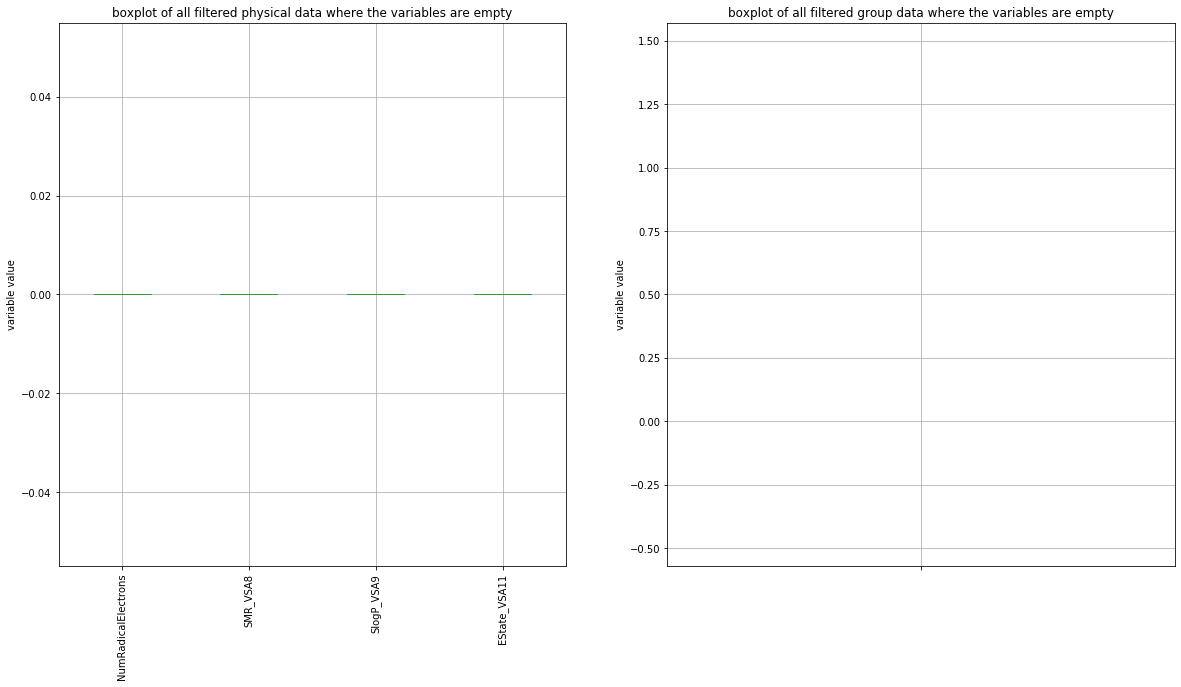

In [11]:
def drop_empty_vars(df_data):
    nunique = df_data.nunique()
    cols_to_drop = nunique[nunique == 1].index
    
    return cols_to_drop

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))

df_phy_empty = df_physical_filtered[drop_empty_vars(df_physical_filtered)]
df_grp_empty = df_group_filtered[drop_empty_vars(df_group_filtered)]

df_phy_empty.boxplot(ax=ax[0]);
ax[0].set_xticklabels(df_phy_empty.columns, rotation = 90);
ax[0].set_title('boxplot of all filtered physical data where the variables are empty');
ax[0].set_ylabel('variable value');

df_grp_empty.boxplot(ax=ax[1]);
ax[1].set_xticklabels(df_grp_empty.columns, rotation = 90);
ax[1].set_title('boxplot of all filtered group data where the variables are empty');
ax[1].set_ylabel('variable value');

fig.savefig('empty_vars.png')

remove all empty variables:

In [12]:
df_physical_filtered = df_physical_filtered.drop(columns=df_phy_empty.columns)
df_group_filtered = df_group_filtered.drop(columns=df_grp_empty.columns)

<br>
<br>
<br>

## 2 scaling:
<br>
<br>
<br>


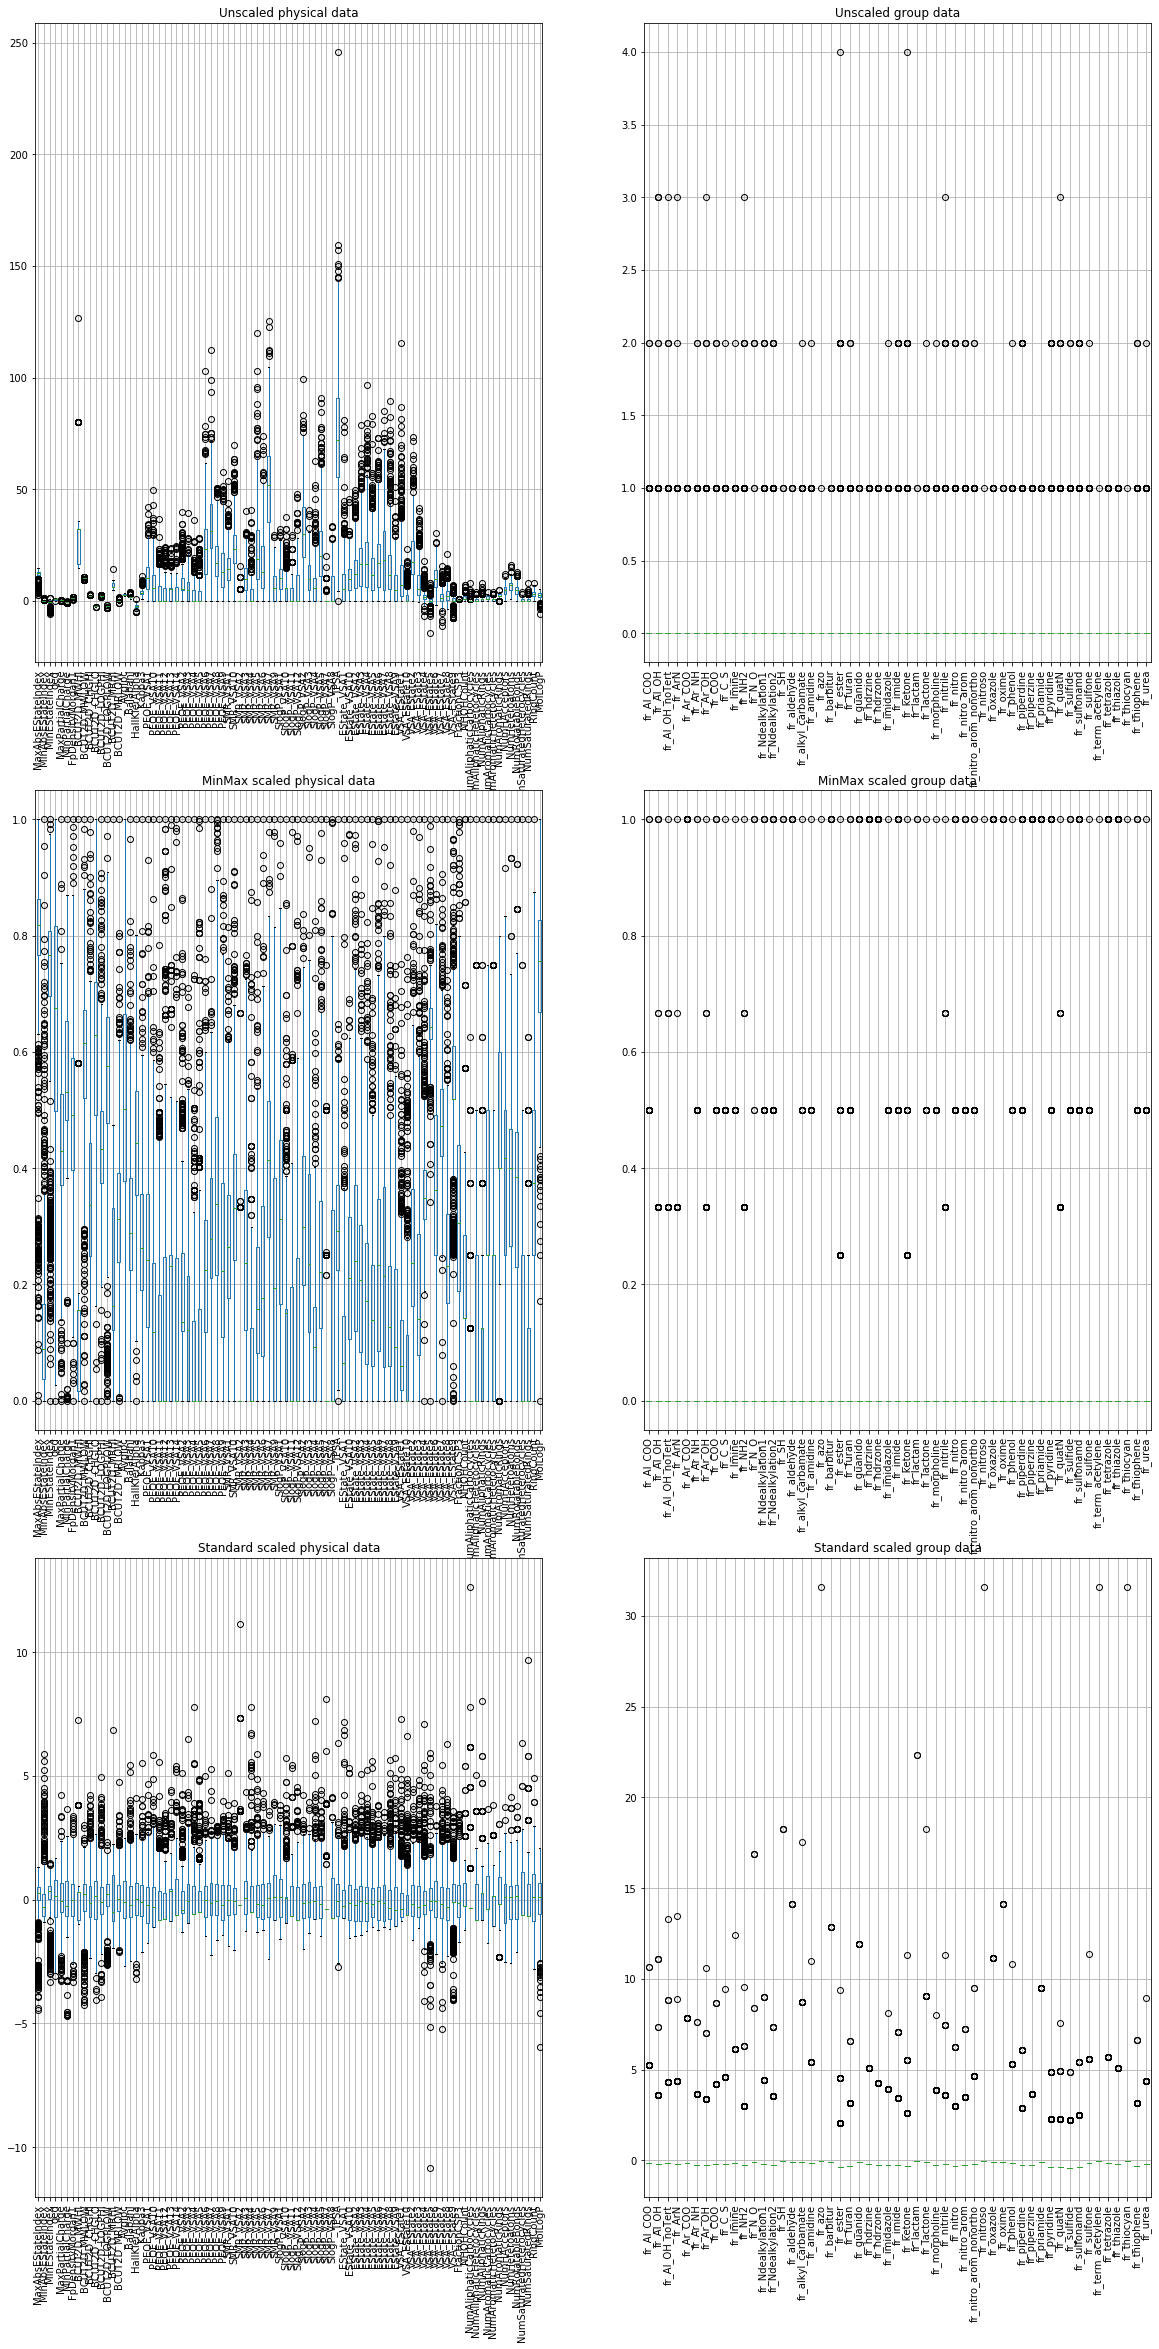

In [13]:
scaler_mm = MinMaxScaler()
df_phys_scaled_mm = pd.DataFrame(scaler_mm.fit_transform(df_physical_filtered), columns = list(df_physical_filtered.columns))
df_grp_scaled_mm = pd.DataFrame(scaler_mm.fit_transform(df_group_filtered), columns = list(df_group_filtered.columns))

scaler_std = StandardScaler()
df_phys_scaled_std = pd.DataFrame(scaler_std.fit_transform(df_physical_filtered), columns = list(df_physical_filtered.columns))
df_grp_scaled_std = pd.DataFrame(scaler_std.fit_transform(df_group_filtered), columns = list(df_group_filtered.columns))

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,40))

df_physical_filtered.boxplot(ax=ax[0,0]);
ax[0,0].set_title('Unscaled physical data');
ax[0,0].set_xticklabels(df_physical_filtered.columns, rotation = 90);
df_group_filtered.boxplot(ax=ax[0,1]);
ax[0,1].set_xticklabels(df_group_filtered.columns, rotation = 90);
ax[0,1].set_title('Unscaled group data');

df_phys_scaled_mm.boxplot(ax=ax[1,0]);
ax[1,0].set_xticklabels(df_phys_scaled_mm.columns, rotation = 90);
ax[1,0].set_title('MinMax scaled physical data');
df_grp_scaled_mm.boxplot(ax=ax[1,1]);
ax[1,1].set_xticklabels(df_grp_scaled_mm.columns, rotation = 90);
ax[1,1].set_title('MinMax scaled group data');

df_phys_scaled_std.boxplot(ax=ax[2,0]);
ax[2,0].set_xticklabels(df_phys_scaled_std.columns, rotation = 90);
ax[2,0].set_title('Standard scaled physical data');
df_grp_scaled_std.boxplot(ax=ax[2,1]);
ax[2,1].set_xticklabels(df_grp_scaled_std.columns, rotation = 90);
ax[2,1].set_title('Standard scaled group data');

fig.savefig('scaled_data.png')

<br>
<br>
<br>

## 3 Variable analysis:
<br>
<br>
<br>

In [14]:
def pca_fitting(df_scaled):
    pca = PCA()
    X_pca = pca.fit_transform(df_scaled)

    n_components = len(pca.explained_variance_ratio_)
    explained_variance = pca.explained_variance_ratio_
    cum_explained_variance = np.cumsum(explained_variance)
    idx = np.arange(n_components)+1
    df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                         index=['explained variance', 'cumulative'], 
                                         columns=idx).T
    return [idx,df_explained_variance]

idx_mm,df_mm_explained_variance = pca_fitting(df_phys_scaled_mm)
idx_std,df_std_explained_variance = pca_fitting(df_phys_scaled_std)

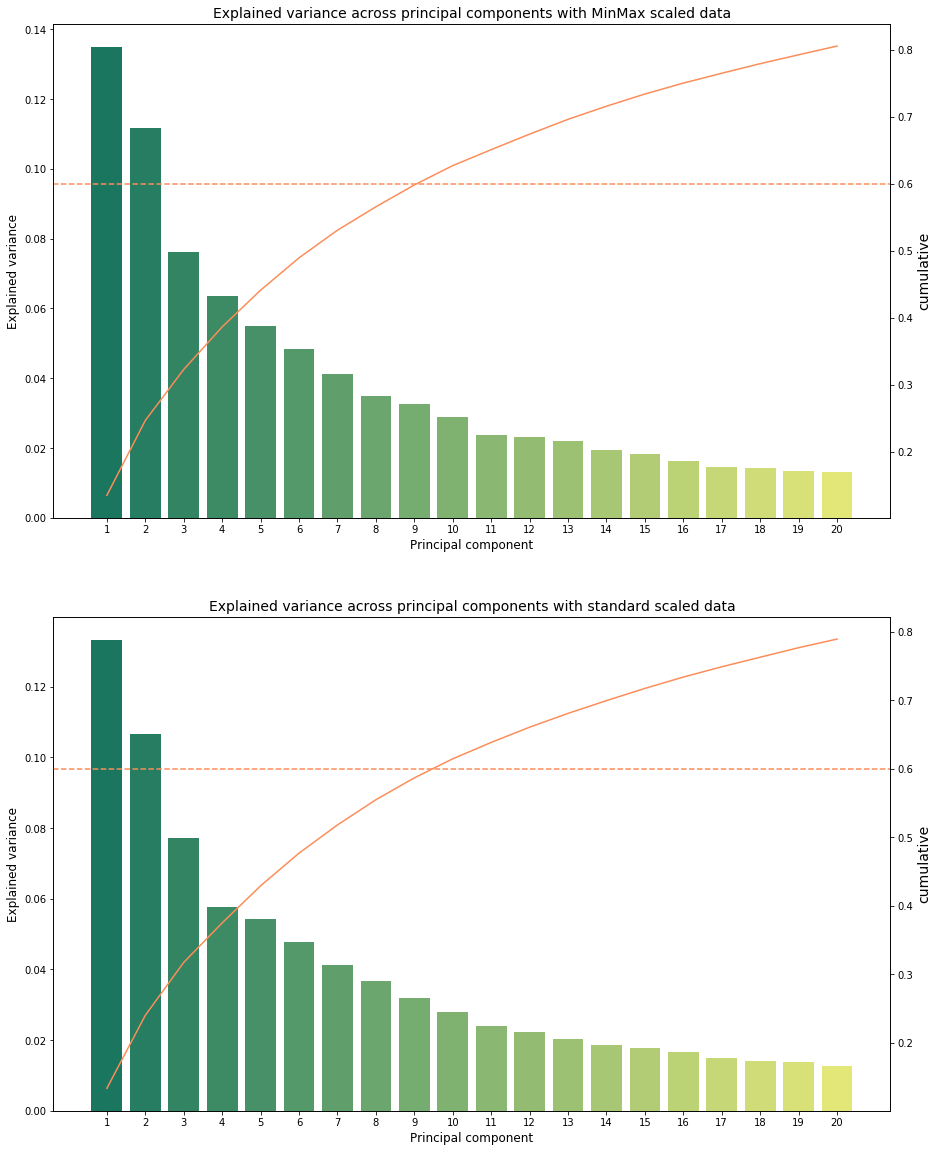

In [20]:
nr_comp = 20
confidance_level = 0.6

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,20));

ax1 = sns.barplot(x=idx_mm[:nr_comp], y='explained variance', data=df_mm_explained_variance.loc[:nr_comp,:], palette='summer', ax=ax[0]);
ax1 = ax1.twinx();

ax[0].set_title('Explained variance across principal components with MinMax scaled data', fontsize=14);
ax[0].set_xlabel('Principal component', fontsize=12);
ax[0].set_ylabel('Explained variance', fontsize=12);
ax1.grid(False);
ax1.set_ylabel('Cumulative', fontsize=14);
ax1 = sns.lineplot(x=idx_mm[:nr_comp]-1, y='cumulative', data=df_mm_explained_variance.loc[:nr_comp,:], color='#fc8d59');
ax1.axhline(confidance_level, ls='--', color='#fc8d59');

ax2 = sns.barplot(x=idx_std[:nr_comp], y='explained variance', data=df_std_explained_variance.loc[:nr_comp,:], palette='summer', ax=ax[1]);
ax2 = ax2.twinx();

ax[1].set_title('Explained variance across principal components with standard scaled data', fontsize=14);
ax[1].set_xlabel('Principal component', fontsize=12);
ax[1].set_ylabel('Explained variance', fontsize=12);
ax2.grid(False);
ax2.set_ylabel('Cumulative', fontsize=14);
ax2 = sns.lineplot(x=idx_std[:nr_comp]-1, y='cumulative', data=df_std_explained_variance.loc[:nr_comp,:], color='#fc8d59');
ax2.axhline(confidance_level, ls='--', color='#fc8d59');

fig.savefig('PCA_group.png')

In [16]:
mm_pc_max = df_mm_explained_variance[df_mm_explained_variance['cumulative'] >= confidance_level].index[0]
std_pc_max = df_std_explained_variance[df_std_explained_variance['cumulative'] >= confidance_level].index[0]
print('To get to the confidance level of {}%, we need {} components with the MinMax scaled data; we need {} components with the Standard scaled data.'.format(confidance_level*100,mm_pc_max,std_pc_max))

To get to the confidance level of 60.0%, we need 10 components with the MinMax scaled data; we need 10 components with the Standard scaled data.


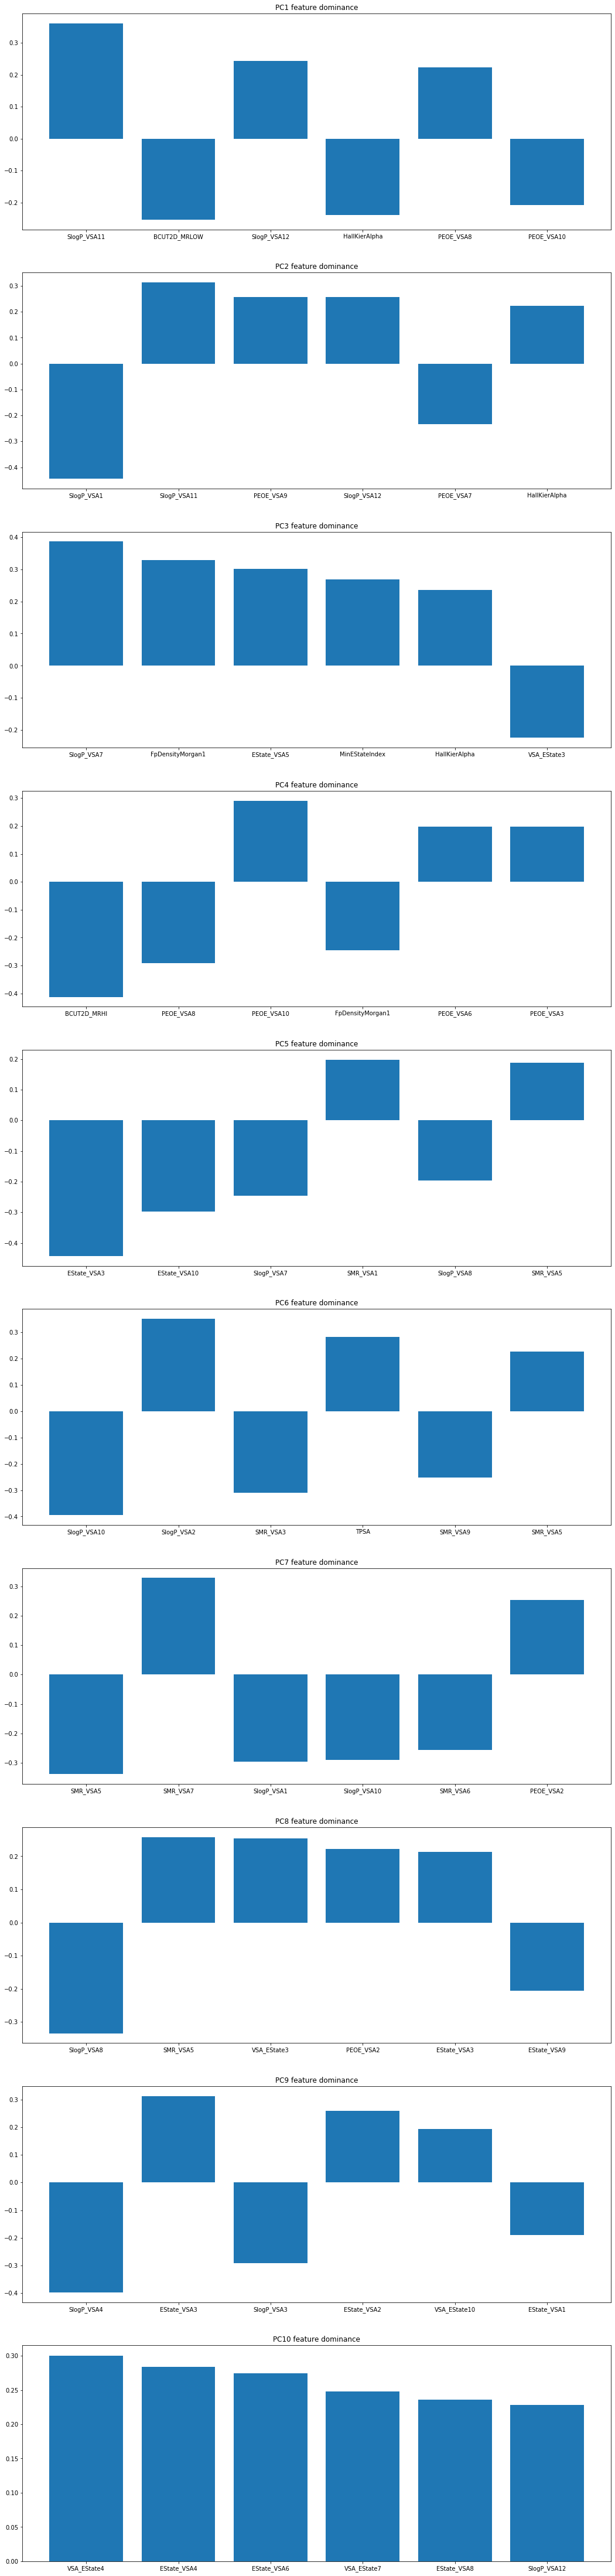

In [17]:
component_map = dict()

for i in range(0,len(df_physical_filtered.columns)):
    component_map[i] = df_physical_filtered.columns[i]

def get_top_pc_features(nr_features, nr_comp, scaled_data):
    pca = PCA()
    pca.fit_transform(df_phys_scaled_mm)
    df_loadings = pd.DataFrame(data=pca.components_)
        
    top_vars = [list(abs(df_loadings[i]).nlargest(n=nr_features).index) for i in range(0,nr_comp)]

    return top_vars, df_loadings

top_mm, df_loadings_mm = get_top_pc_features(6,mm_pc_max, df_phys_scaled_mm)

fig, ax = plt.subplots(nrows=len(top_mm), ncols=1, figsize=(3*len(top_mm[0]),8*len(top_mm)))

for i in range(0,len(top_mm)):
    x = []
    y = []
    for j in range(0,len(top_mm[i])):
        x.append(top_mm[i][j])
        y.append(df_loadings_mm.loc[top_mm[i][j],i])
    x = list(map(component_map.get, x))
    ax[i].bar(x,y)
    ax[i].set_title("PC{} feature dominance".format(i+1))

In [18]:
pca = PCA()
pca.fit_transform(df_phys_scaled_mm)
df_loadings = pd.DataFrame(data=pca.components_)
df_hits = pd.DataFrame(abs(df_loadings).sum()/len(df_loadings))
df_hits['feature'] = component_map.values()
df_hits = df_hits.set_index('feature')
df_hits.sort_values(0, ascending=False).head(20)

,0
feature,
SMR_VSA6,0.088818
SMR_VSA3,0.085861
SlogP_VSA5,0.085638
EState_VSA9,0.085546
EState_VSA1,0.085133
SMR_VSA10,0.084966
SlogP_VSA4,0.083718
EState_VSA8,0.083648
VSA_EState3,0.083497


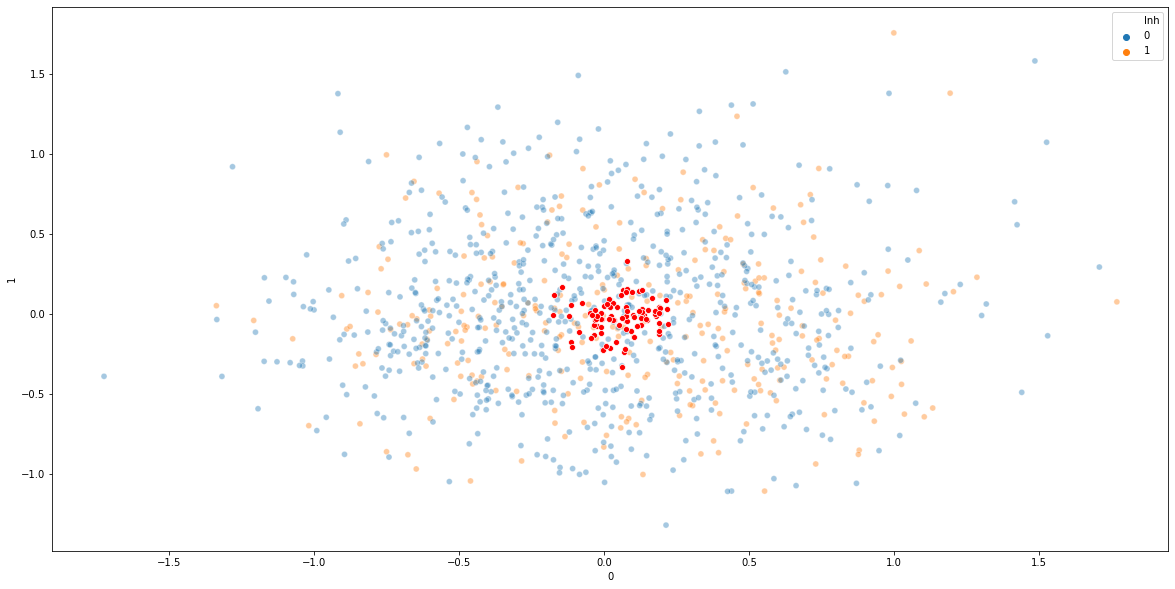

In [19]:
pca = PCA(n_components = mm_pc_max)
df_pca_fitted = pd.DataFrame(pca.fit_transform(df_phys_scaled_mm))
df_pca_fitted['Inh'] = df_data['ALDH1_inhibition']
df_components = pd.DataFrame(pca.components_).T

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(data=df_pca_fitted,x=0,y=1, alpha=0.4, hue='Inh');
sns.scatterplot(data=df_components, x=0,y=1,color='red', ax=ax);